In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('all')

### 어휘 분석

> 문장 내에 있는 여러 단어들을 형태소 기준으로 분리하거나 언어학적으로 어떤 품사에 해당하는지를 분석  
> konlpy를 이용해 한국어에서 사용되는 여러 형태소 분석기를 알아보고 차이점을 확인

**pos_tag**

- nltk의 pos_tag는 분리된 단어들에 대해서 형태소 분석 후 알맞는 품사를 태깅해서 보여줌
- 따라서 input으로는 분리된 단어 리스트가 입력되어야하며 output으로는 tuple형태의 `(형태소, 품사)` 형태로 반환

In [2]:
sentence="My name is jack and i am 22 years old and my major is natural language processing"
tokens = nltk.word_tokenize(sentence) # 토크나이저로 분리
tagged = nltk.pos_tag(tokens) # pos tagging 실행

for i,j in tagged:
  print(f'{i} - {j}')

My - PRP$
name - NN
is - VBZ
jack - NN
and - CC
i - NN
am - VBP
22 - CD
years - NNS
old - JJ
and - CC
my - PRP$
major - JJ
is - VBZ
natural - JJ
language - NN
processing - NN


- 원하는 품사의 형태소만 추출

In [3]:
allnoun = []
for word, pos in tagged:
  if pos in ['NN', 'NNP']: # 품사태그 중 NN, NNP만 추출
    allnoun.append(word)

print("형태소 분석 결과: ",tagged)
print("명사만 추출: ", allnoun)

allverb = []
for word, pos in tagged:
  if pos in ['VBZ','VBD']: # 품사태그 중 VBZ, VBD만 추출
    allverb.append(word)

print("동사만 추출",allverb)

형태소 분석 결과:  [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('jack', 'NN'), ('and', 'CC'), ('i', 'NN'), ('am', 'VBP'), ('22', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('my', 'PRP$'), ('major', 'JJ'), ('is', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]
명사만 추출:  ['name', 'jack', 'i', 'language', 'processing']
동사만 추출 ['is', 'is']


### konlpy

> 영어는 일반적으로 형태소 기준이 space 즉, 공백을 기준으로 분리되지만  
> 한국어는 교착어로써 형태소 분석기가 필요하다. 

In [4]:
# konlpy 관련 패키지 import
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter

kkma = Kkma()
okt = Okt()
komoran = Komoran()
hannanum = Hannanum()
twitter = Twitter()

/Users/mungughyeon/miniforge3/envs/Upstage/lib/python3.9/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
# konlpy 의 라이브러리 형태소 비교
print("okt 형태소 분석 :", okt.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 형태소 분석 : ", kkma.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 형태소 분석 : ", hannanum.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 형태소 분석 : ", komoran.morphs(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 형태소 분석 : ", twitter.morphs(u"집에 가면 감자 좀 쪄줄래?"))

okt 형태소 분석 : ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']
kkma 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
hannanum 형태소 분석 :  ['집', '에', '가', '면', '감', '자', '좀', '찌', '어', '줄', '래', '?']
komoran 형태소 분석 :  ['집', '에', '가', '면', '감자', '좀', '찌', '어', '주', 'ㄹ래', '?']
twitter 형태소 분석 :  ['집', '에', '가면', '감자', '좀', '쪄줄래', '?']


In [6]:
# konlpy 의 라이브러리 품사태깅 비교
print("okt 품사태깅 :", okt.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("kkma 품사태깅 : ", kkma.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("hannanum 품사태깅 : ", hannanum.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("komoran 품사태깅 : ", komoran.pos(u"집에 가면 감자 좀 쪄줄래?"))
print("twitter 품사태깅 : ", twitter.pos(u"집에 가면 감자 좀 쪄줄래?"))

okt 품사태깅 : [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]
kkma 품사태깅 :  [('집', 'NNG'), ('에', 'JKM'), ('가', 'VV'), ('면', 'ECE'), ('감자', 'NNG'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'ECS'), ('주', 'VXV'), ('ㄹ래', 'EFQ'), ('?', 'SF')]
hannanum 품사태깅 :  [('집', 'N'), ('에', 'J'), ('가', 'P'), ('면', 'E'), ('감', 'P'), ('자', 'E'), ('좀', 'M'), ('찌', 'P'), ('어', 'E'), ('줄', 'P'), ('래', 'E'), ('?', 'S')]
komoran 품사태깅 :  [('집', 'NNG'), ('에', 'JKB'), ('가', 'VV'), ('면', 'EC'), ('감자', 'NNP'), ('좀', 'MAG'), ('찌', 'VV'), ('어', 'EC'), ('주', 'VX'), ('ㄹ래', 'EF'), ('?', 'SF')]
twitter 품사태깅 :  [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쪄줄래', 'Verb'), ('?', 'Punctuation')]


In [7]:
# konlpy 의 라이브러리 명사 추출
komoran.nouns('집에 가면 감자 좀 쪄줄래?')

['집', '감자']

### 구문 분석

> 구문 분석은 명사구, 동사구 처럼 구문구조를 분석하는 것을 의미한다.  
> 문장을 이루고 있는 구, 단어들이 문장 내에서 어떤 수식 의존 관계를 갖는지 일종의 Tree를 만들어줌

In [8]:
import konlpy
import nltk

sentence = '만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'
words = konlpy.tag.Twitter().pos(sentence) # 품사태깅
words

[('만', 'Noun'),
 ('6', 'Number'),
 ('세', 'Noun'),
 ('이하', 'Noun'),
 ('의', 'Josa'),
 ('초등학교', 'Noun'),
 ('취학', 'Noun'),
 ('전', 'Noun'),
 ('자녀', 'Noun'),
 ('를', 'Josa'),
 ('양육', 'Noun'),
 ('하기', 'Verb'),
 ('위', 'Noun'),
 ('해서는', 'Verb')]

- 명사, 동사, 형용사 구의 구칙을 사전에 정의

In [9]:
# 명사, 동사, 형용사 구의 규칙 정의
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar) # 선언된 grammer rule을 parser에게 입력
chunks = parser.parse(words) # grammer rule에 따라 단어를 파싱
print("# Print whole tree")
print(chunks.pprint())

# 명사구에 해당하는 subtree만 출력
print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label() == 'NP': # 서브트리의 품사가 NP인 경우
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())


# Print whole tree
(S
  (NP 만/Noun 6/Number 세/Noun 이하/Noun)
  의/Josa
  (NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
  를/Josa
  (NP 양육/Noun)
  (VP 하기/Verb)
  (NP 위/Noun)
  (VP 해서는/Verb))
None

# Print noun phrases only
만 6 세 이하
(NP 만/Noun 6/Number 세/Noun 이하/Noun)
None
초등학교 취학 전 자녀
(NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
None
양육
(NP 양육/Noun)
None
위
(NP 위/Noun)
None


### 개체명 인식

> 개체명 인식(Named Entity Recognition)이란 말 그대로 이름을 가진 개체를 인식하겠다는 것을 의미한다.  
> 어떤 이름을 의미하는 단어를 보고는 그 단어가 어떤 유형에 속하는 단어인지를 인식하는 것을 말함

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk

sent = "Mark is studying at Stanford University in California"
tokens = word_tokenize(sent) # 토크나이징
tagged = pos_tag(tokens) # 품사태깅
entities = ne_chunk(tagged) # 개체명인식

print(entities)

(S
  (PERSON Mark/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  in/IN
  (GPE California/NNP))


### 키워드 분석

In [14]:
import pandas as pd
from tqdm import tqdm
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk import word_tokenize


nltk.corpus.gutenberg.fileids() # nltk.corpus.gutenberg 는 여러 텍스트 코퍼스들을 제공

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [18]:
data = nltk.corpus.gutenberg.raw('austen-emma.txt').lower()
word_list = word_tokenize(data)
word_list[:10]

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter']

In [19]:
# 위에서 추출된 morphs를 통해 원하는 품사에 해당하는 단어들만 추출해 리스트로 반환하는 함수
def extract_by_tag(word_list, tag_name):
  pos_list = pos_tag(word_list, tagset='universal') # 여기서는 universal tag를 이용
  extracted_list = []
  for word_tag in tqdm(pos_list):
    if tag_name in word_tag[1]: # 0번은 품사 태그. 1번은 텍스트로 여기서는 텍스트만 추출
      extracted_list.append(word_tag[0])
  return extracted_list

# 추출된 리스트를 출현단어 빈도수를 매핑하여 정렬
def sorting(sentence_list):
  count = Counter(sentence_list)
  words = (dict(count.most_common()))
  return words

In [20]:
nouns = extract_by_tag(word_list,'NOUN') # 명사만 추출
print(f'명사 예시:{nouns[5:10]}')

adjs = extract_by_tag(word_list,'ADJ') # 형용사만 추출
print(f'\n형용사 예시:{adjs[:5]}')

100%|██████████| 191851/191851 [00:00<00:00, 4191070.87it/s]


명사 예시:['chapter', 'i', 'woodhouse', 'handsome', 'clever']


100%|██████████| 191851/191851 [00:00<00:00, 4603045.60it/s]


형용사 예시:['rich', 'comfortable', 'happy', 'best', 'little']


- nltk에서 정의된 불용어들을 명사, 형용사 리스트에서 제외하는 정제작업을 거침
- 그 후 sorting을 통해 높은 빈도수를 갖는 단어 순으로 정렬

In [21]:
# 제거할 불용어를 정의
stop = stopwords.words('english')
stop.extend(['mr.','mrs.']) # 원하는 불용어 추가

# 지정한 불용어를 각각 리스트에서 제거함
nouns = [token for token in nouns if not token in stop]
adjs = [token for token in adjs if not token in stop]

# 추출된 리스트를 출현단어 빈도수를 매핑하여 정렬
nouns_count = sorting(nouns)
adj_count = sorting(adjs)

- Wordcloud와 빈도기반 키워드 그래프를 생성

In [ ]:
def view_wordcloud(counter_class):
  # 단어 빈도수를 기준으로 WordCloud를 생성함
  wordcloud = WordCloud(background_color='white',
                      colormap = "Accent_r",width=2500, height=1500,
                      stopwords=stopwords
                      ).generate_from_frequencies(counter_class)
  plt.figure(figsize=(10,8)) 
  plt.imshow(wordcloud)
  plt.tight_layout(pad=0)
  plt.axis('off')
  plt.show()

  # 상위 20개 키워드의 출현 빈도수 표현
  plt.figure(figsize=(10, 5)) 
  plt.xlabel('keywords') 
  plt.ylabel('counts') 
  plt.xticks(rotation=70) 
  for key, value in zip(list(counter_class.keys())[:20],list(counter_class.values())[:20]): # 상위 20개만 추출
      plt.bar(key, value, color='lightgrey') # barchart 생성
  plt.show()


  counter_df = pd.DataFrame({'word':counter_class.keys(),'counts':counter_class.values()})
  display(counter_df)
  return counter_df

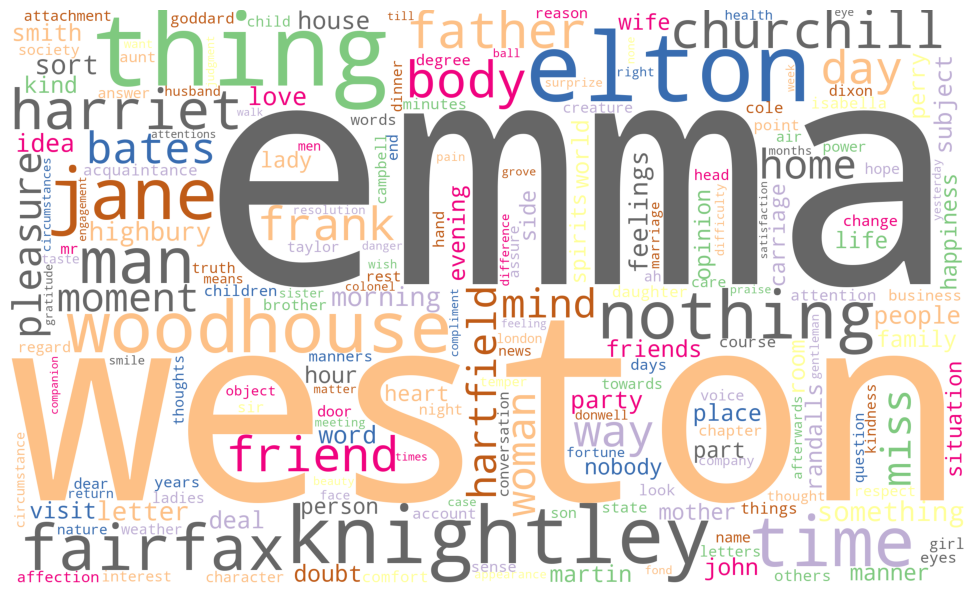

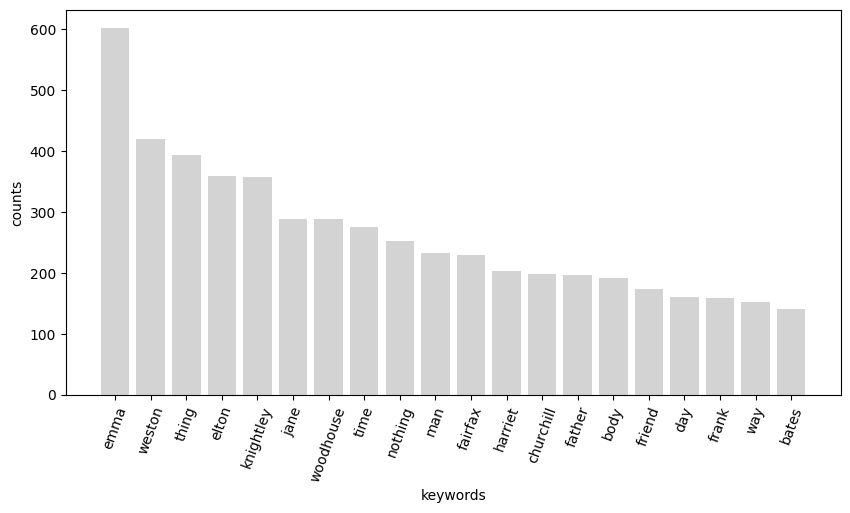

,word,counts
0,emma,602
1,weston,420
2,thing,394
3,elton,359
4,knightley,357
...,...,...
4185,veils,1
4186,deficiencies,1
4187,predictions,1
4188,band,1


In [23]:
nouns_df = view_wordcloud(nouns_count)

- 형용사 단어들에 대한 결과

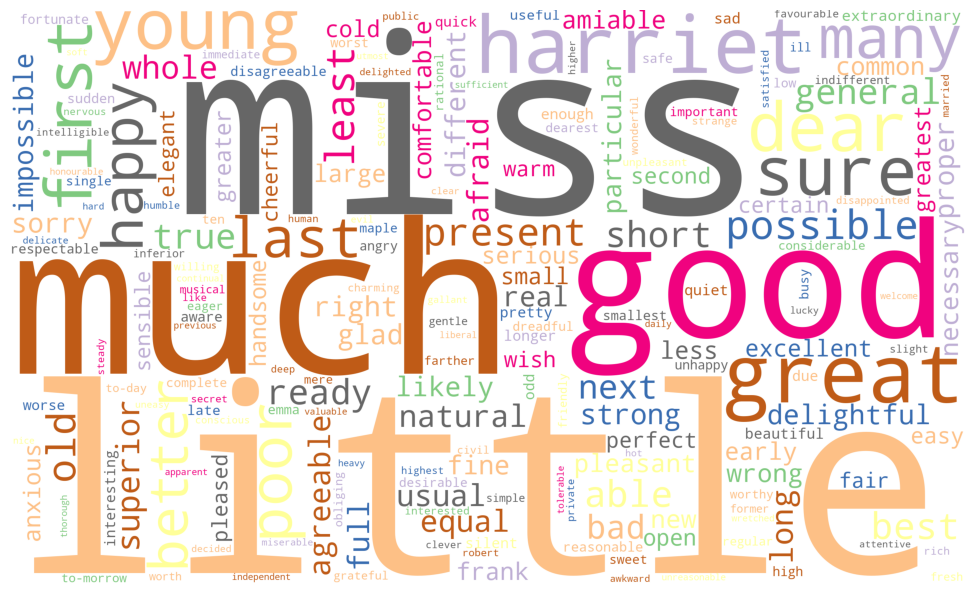

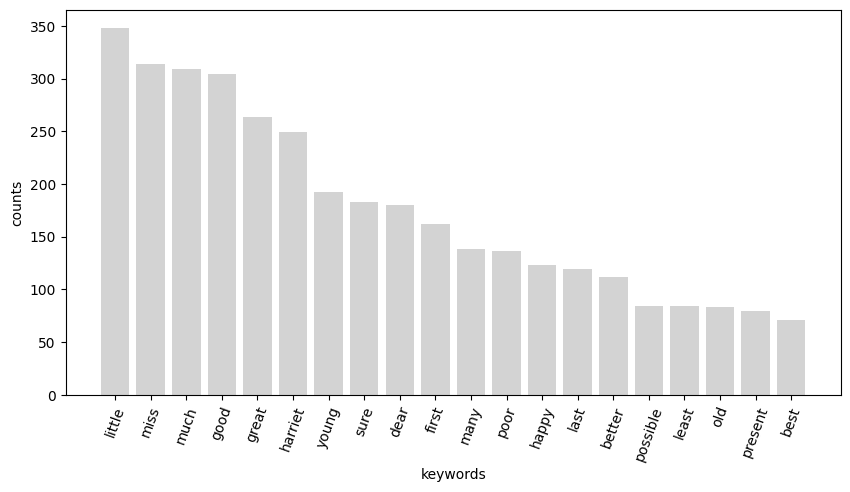

,word,counts
0,little,348
1,miss,314
2,much,309
3,good,304
4,great,263
...,...,...
1737,gradual,1
1738,intermediate,1
1739,pain.,1
1740,safe.,1


In [24]:
adj_df = view_wordcloud(adj_count)